In [2]:
# simple forward Euler solver for the 1D heat equation
#   u_t = kappa u_xx  0<x<L, 0<t<T
# with zero-temperature boundary conditions
#   u=0 at x=0,L, t>0
# and prescribed initial temperature
#   u=u_I(x) 0<=x<=L,t=0

In [3]:
import numpy as np
import pylab as pl
from math import pi
from scipy.sparse import diags

In [4]:
# Set problem parameters/functions
kappa = 1.0  # diffusion constant
L=1.0         # length of spatial domain
T=0.5       # total time to solve for

In [5]:
def u_I(x):
    # initial temperature distribution
    y = np.sin(pi*x/L)
    return y

In [6]:
# change the initial condition — for example, to u(x, 0) = sinp(πx) for some integer p
p = 2
def u_I2(x):
    #initial temperature distribution
    y = (np.sin(pi*x))**p
    return y

In [7]:
def u_exact(x,t):
    # the exact solution
    y = np.exp(-kappa*(pi**2/L**2)*t)*np.sin(pi*x/L)
    return y

In [8]:
# Set problem parameters/functions
kappa = 3.0  # diffusion constant
L=2.0         # length of spatial domain
T=0.5 

In [9]:
def u_exact1(x,t):
    # the exact solution
    y = 100 - 50*x - (100/pi)*(np.exp(-3*t*pi**2)*np.sin(pi*x))
    return y

In [10]:
def u_I1(x):
    # initial temperature distribution
    y = 50
    return y

In [11]:
def u_exact2(x,t):
    # the exact solution
    y = 47.0449*np.exp(-0.0210*t)*np.sin(0.7249*x) + 45.1413*np.exp(-0.1113*t)*np.sin(1.6679*x)
    return y

In [12]:
def u_I2(x):
    # initial temperature distribution
    y = 100*(1 - (x/3))
    return y

In [13]:
# Set problem parameters/functions
kappa = 1/25  # diffusion constant
L=3.0         # length of spatial domain
T=0.5 

In [14]:
# differentiated version of u
def u_diff(x,t):
    dudx = (pi*np.exp(-kappa*(pi**2/L**2)*t)*np.cos(pi*x/L))/L
    return dudx
   

In [15]:
# Set numerical parameters
mx = 20  # number of gridpoints in space
mt = 1000  # number of gridpoints in time

In [16]:
# Set up the numerical environment variables
x = np.linspace(0, L, mx+1)     # mesh points in space
t = np.linspace(0, T, mt+1)     # mesh points in time
deltax = x[1] - x[0]            # gridspacing in x
deltat = t[1] - t[0]            # gridspacing in t
lmbda = kappa*deltat/(deltax**2)    # mesh fourier number
print("deltax=",deltax)
print("deltat=",deltat)
print("lambda=",lmbda)

deltax= 0.15
deltat= 0.0005
lambda= 0.000888888888888889


In [17]:
# Set up the solution variables
u_j = np.zeros(x.size)        # u at current time step
u_jp1 = np.zeros(x.size)      # u at next time step

In [18]:
# Set initial condition
for i in range(0, mx+1):
    u_j[i] = u_I(x[i])

In [19]:
# Set initial condition
for i in range(0, mx+1):
    u_j[i] = u_I1(x[i])

In [20]:
# non-homogenous Dirichlet boundary condition
def p(t):
    return 100

def q(t):
    return 0
    

In [21]:
# neumann boundary conditions
def P(t):
    return u_diff(0,t)

def Q(t):
    return u_diff(L,t)

In [22]:
def u_I(x):
    # initial temperature distribution
    y = np.sin(pi*x/L)
    return y

In [23]:
# function to solve PDE using euler method
def PDE_solve_euler(mt,mx,boundary_condition, initial_condition):
    u_j = np.zeros(x.size)        # u at current time step
    u_jp1 = np.zeros(x.size)      # u at next time step
    # u at next time step
    # Set initial condition
    for i in range(0, mx+1):
        u_j[i] = initial_condition(x[i])
    u_jp1 = np.zeros((mx+1,1))
    k = [lmbda*np.ones(mx-2),(1-2*lmbda)*np.ones(mx-1),lmbda*np.ones(mx-2)]
    offset = [-1,0,1]
    A = diags(k,offset).toarray()


    for j in range(0, mt):
        u_jp1[1:-1] = np.matmul(A , u_j[1:-1]).reshape(9,1)
        u_j = u_jp1
    
    return u_j

In [24]:
# function to solve PDE using euler method
def PDE_solve_euler_1(mt,mx,boundary_condition, initial_condition):
    # u at next time step
    # Set initial condition
    for i in range(0, mx+1):
        u_j[i] = initial_condition(x[i])
    
    for j in range(0, mt):
    # Forward Euler timestep at inner mesh points
    # PDE discretised at position x[i], time t[j]
        for i in range(1, mx):
            u_jp1[i] = u_j[i] + lmbda*(u_j[i-1] - 2*u_j[i] + u_j[i+1])
        # Boundary conditions
        u_jp1[0] = boundary_condition[0]; u_jp1[mx] = boundary_condition[1]
        u_j[:] = u_jp1[:]
    return u_j

In [25]:
# Plot the final result and exact solution for forward euler
pl.plot(x,PDE_solve_euler(1000,10,[0,0],u_I),'ro',label='num')
#xx = np.linspace(0,L,250)
#pl.plot(xx,u_exact(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 19 is different from 9)

In [26]:
# Solve the PDE: loop over all time points using forward euler
for j in range(0, mt):
    # Forward Euler timestep at inner mesh points
    # PDE discretised at position x[i], time t[j]
    for i in range(1, mx):
        u_jp1[i] = u_j[i] + lmbda*(u_j[i-1] - 2*u_j[i] + u_j[i+1])
        
        # added equations for Dirichlet boundary condition
        #u_jp1[1] = u_j[1] + lmbda*(-2*u_j[1] + u_j[2]) + lmbda*p(t[j])
        #u_jp1[mx-1] = u_j[mx-1] + lmbda*(u_j[mx-2] - 2*u_j[mx-1]) + lmbda*q(t[j])
        
        # added equations for Neumann boundary condition
        #u_jp1[0] = u_j[0] + lmbda*(-2*u_j[0] + 2*u_j[1]) -2*lmbda*deltax*P(t[j])
        #u_jp1[mx] = u_j[mx] + lmbda*(2*u_j[mx-1] - 2*u_j[mx]) + 2*lmbda*deltax*Q(t[j])
        
        
    # Boundary conditions
    u_jp1[0] = 0; u_jp1[mx] = 0
    
    # Boundary conditions for Neumann
    
    
    # Boundary conditions for dirichlet
    #u_jp1[0] = p(t[j+1]); u_jp1[mx] = q(t[j+1])
    
    # Save u_j at time t[j+1]
    u_j[:] = u_jp1[:]

<function matplotlib.pyplot.show(close=None, block=None)>

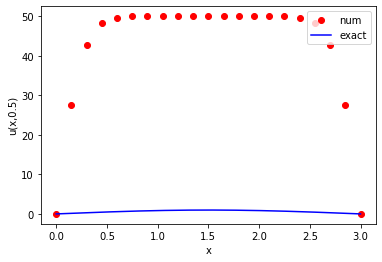

In [27]:
# Plot the final result and exact solution for forward euler
pl.plot(x,u_j,'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show

In [28]:
# The forward euler is unstable when lambda > 1/2 

In [29]:
# steady state of the PDE problem is zero

In [30]:
# plot in 3d (not sure if this is working currently)
# Data for three-dimensional scattered points
#import matplotlib.pyplot as plt
#ax = plt.axes(projection='3d')
#ax.scatter3D(xx,u_exact(xx,t), t, cmap='greens',label='exact');
#ax.scatter3D(x,u_j,mt, cmap='greens', label='num');
#ax.xlabel('x')
#ax.ylabel('u(x,0.5)')
#ax.zlabel('t')

#ax.set_xlabel('x')
#ax.set_ylabel('u(x,0.5)')
#ax.set_zlabel('t')
#ax.legend(loc='upper right')
#plt.show


In [31]:
# neumann boundary condition matrix form using forward euler
u_jp1 = np.zeros((mx+1,1))
k = [lmbda*np.ones(mx),(1-2*lmbda)*np.ones(mx+1),lmbda*np.ones(mx)]
offset = [-1,0,1]
A = diags(k,offset).toarray()
A[0,1] = 2*lmbda
A[-1,-2] = 2*lmbda
s = np.zeros((mx+1,1))
print(A)

for j in range(0, mt): 
    s[0] = -P(t[j])
    s[-1] = Q(t[j])

    u_jp1 = np.matmul(A , u_j).reshape(11,1) + 2*lmbda*deltax*s
    u_j = u_jp1
    
    
# Plot the final result and exact solution for forward euler
pl.plot(x,u_j,'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show

[[9.98222222e-01 1.77777778e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [8.88888889e-04 9.98222222e-01 8.88888889e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 8.88888889e-04 9.98222222e-01 8.88888889e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00

ValueError: cannot reshape array of size 21 into shape (11,1)

In [32]:
# dirichlet boundary condition matrix form using forward euler
u_jp1 = np.zeros((mx+1,1))
k = [lmbda*np.ones(mx-2),(1-2*lmbda)*np.ones(mx-1),lmbda*np.ones(mx-2)]
offset = [-1,0,1]
A = diags(k,offset, shape=(mx-1, mx-1)).toarray()
s = np.zeros((mx-1,1))


for j in range(0, mt):
    s[0] = p(t[j])
    s[-1] = q(t[j])
    
    
    u_jp1[1:-1] = np.matmul(A , u_j[1:-1]).reshape(9,1) + lmbda*s
    
    u_jp1[0] = p(t[j+1]); u_jp1[mx] = q(t[j+1])
    
    u_j = u_jp1
    
    
# Plot the final result and exact solution for forward euler
pl.plot(x,u_j,'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact1(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show
 

ValueError: cannot reshape array of size 19 into shape (9,1)

In [33]:
# dirichlet boundary condition matrix form using forward euler
u_jp1 = np.zeros((mx+1,1))
k = [lmbda*np.ones(mx-2),(1-2*lmbda)*np.ones(mx-1),lmbda*np.ones(mx-2)]
offset = [-1,0,1]
A = diags(k,offset).toarray()

s = np.zeros((mx-1,1))

A[-1,0] = lmbda
A[0,-1] = lmbda
print(A)
print(mx)

[[9.98222222e-01 8.88888889e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 8.88888889e-04]
 [8.88888889e-04 9.98222222e-01 8.88888889e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.88888889e-04 9.98222222e-01 8.88888889e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.88888889e-04 9.98222222e-01
  8.88888889e-04 0.00000000e+00 0.00000000e+00 0.0

<function matplotlib.pyplot.show(close=None, block=None)>

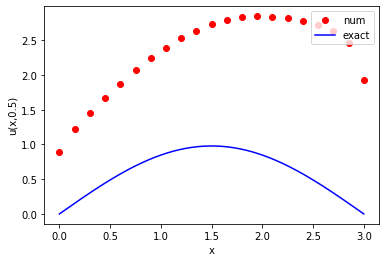

In [34]:
# adding rhs function
# Set up the solution variables
u_j = np.zeros(x.size)        # u at current time step
u_jp1 = np.zeros(x.size)      # u at next time step
F_j = lambda x,t: 8*t + x

k = [lmbda*np.ones(mx),(1-2*lmbda)*np.ones(mx+1),lmbda*np.ones(mx)]
offset = [-1,0,1]
A = diags(k,offset).toarray()
# u at next time step
# Set initial condition
for i in range(0, mx+1):
    u_j[i] = u_I(x[i])

for j in range(0, mt):
    u_jp1 = np.matmul(A , u_j) + deltat*F_j(x,t[j])
    #u_jp2 = np.matmul(A,u_j)
    #u_jp3 = deltat*F_j(x,t[j])
    u_j = u_jp1
    
pl.plot(x ,u_j,'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show

[0.15082905 0.20078356 0.31399477 0.44645401 0.57543377 0.69185
 0.79150818 0.87171705 0.93046636 0.96630505 0.97835016 0.96630505
 0.93046636 0.87171705 0.79150818 0.69185    0.57543377 0.44645401
 0.31399477 0.20078356]


<function matplotlib.pyplot.show(close=None, block=None)>

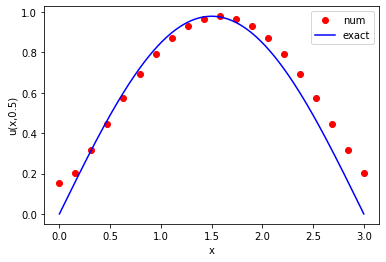

In [35]:
# experiment - periodic boundary (unsure if it works)

#u_j = np.zeros(mx) 
u_j = np.zeros(mx)    
# Set initial condition
for i in range(0, mx):
    u_j[i] = u_I(x[i])
u_jp1 = np.zeros((mx+1,1))
k = [lmbda*np.ones(mx-1),(1-2*lmbda)*np.ones(mx),lmbda*np.ones(mx-1)]
offset = [-1,0,1]
A = diags(k,offset).toarray()
A[-1,0] = lmbda
A[0,-1] = lmbda



for j in range(0, mt):
    u_jp1 = np.matmul(A , u_j)
    u_j = u_jp1
print(u_j)

x = np.linspace(0, L, mx)
pl.plot(x ,u_j,'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show
 

In [195]:
# function to solve PDE using euler method
def PDE_solve_euler(kappa,L,T,initial_condition, args=(), boundary_condition=None,mx=20,mt=1000):
    
    """
    A function that the euler method to solve the 1D heat equation.

    Parameters
    ----------
     
    initial_condition:
     
    args: 
     
    boundary_condition:
       

    Returns
    -------
   
    """
     
    if callable(initial_condition) is not True:
        error_message_initial_cond = "The initial condition must be a callable function"
        print(error_message_initial_cond)
        return None
    
    if isinstance(kappa,(int,float)) is not True:
        error_message_int = "The values of kappa, L and T should be integers or floats"
        print(error_message_int)
        return None
    
        
    if isinstance(L,(int,float)) is not True:
        error_message_int = "The values of kappa, L and T should be integers or floats"
        print(error_message_int)
        return None
    
    if isinstance(T,(int,float)) is not True:
        error_message_int = "The values of kappa, L and T should be integers or floats"
        print(error_message_int)
        return None

    
    if isinstance(mx,int) is not True:
        error_message_ints = "mx and mt must be passed as integers"
        print(error_message_ints)
        return None
        
    if isinstance(mt,int) is not True:
        error_message_ints = "mx and mt must be passed as integers"
        print(error_message_ints)
        return None
    
    if isinstance(args, (tuple, ) is not True:
        error_message_args = "The args must be passed as a callable function"
        print(error_message_args)
        return None
    
    
    #mt = 1000
    #mx = 20
    # Set up the numerical environment variables
    x = np.linspace(0, L, mx+1)     # mesh points in space
    t = np.linspace(0, T, mt+1)     # mesh points in time
    deltax = x[1] - x[0]            # gridspacing in x
    deltat = t[1] - t[0]            # gridspacing in t
    lmbda = kappa*deltat/(deltax**2)    # mesh fourier number
    
    
    
    u_j = np.zeros(x.size)        # u at current time step
    #u_jp1 = np.zeros((mx+1,1))
    u_jp1 = np.zeros(mx+1)
    k = [lmbda*np.ones(mx-2),(1-2*lmbda)*np.ones(mx-1),lmbda*np.ones(mx-2)]
    offset = [-1,0,1]
    A = diags(k,offset,shape=(mx-1, mx-1)).toarray()

    if boundary_condition == 'periodic':
        u_j = np.zeros(mx)
        k = [lmbda*np.ones(mx-1),(1-2*lmbda)*np.ones(mx),lmbda*np.ones(mx-1)]
        
        offset = [-1,0,1]
        A = diags(k,offset).toarray()
        A[-1,0] = lmbda
        A[0,-1] = lmbda
        for i in range(0, mx):
            u_j[i] = initial_condition(x[i])
        for j in range(0, mt):
            u_jp1 = np.matmul(A , u_j)
            u_j = u_jp1
        
    
    elif boundary_condition == 'rhs':
 
       # u_jp1 = np.zeros(x.size)  
        #u_jp1 = np.zeros((mx+1,1))
        u_jp1 = np.zeros(mx+1)
        k = [lmbda*np.ones(mx-2),(1-2*lmbda)*np.ones(mx-1),lmbda*np.ones(mx-2)]
        F_j = args

       # k = [lmbda*np.ones(mx),(1-2*lmbda)*np.ones(mx+1),lmbda*np.ones(mx)]
        offset = [-1,0,1]
        A = diags(k,offset).toarray()
        
        for i in range(0, mx+1):
            u_j[i] = initial_condition(x[i])

        for j in range(0, mt):
            #u_j = rhs_function(A, u_j,F_j,u_jp1,j)
            u_jp1[1:-1] = np.matmul(A , u_j[1:-1]) + deltat*F_j(x[1:-1],t[j])
            u_j = u_jp1

    
    else:
        if callable(initial_condition) is False:
            u_j = initial_condition
            
    
        else:
            for i in range(0, mx+1):
                u_j[i] = initial_condition(x[i])
            
    
  
        for j in range(0, mt):
            if boundary_condition == 'dirichlet':
                # s = np.zeros((mx-1,1))
                p = args[0]
                q = args[1]
                #s = np.zeros((mx-1,1))
                s = np.zeros(mx-1)
                s[0] = p(t[j])
                s[-1] = q(t[j])
                 #u_j = dirichlet(A,s,u_j,u_jp1)
                #u_j = dirichlet_boundary(A, u_j,j,s,u_jp1,lmbda,t,mx,args=args)
                p= args[0] 
                q = args[1]                   
                u_jp1[1:-1] = np.matmul(A , u_j[1:-1]) + lmbda*s
                u_jp1[0] = p(t[j+1]); u_jp1[mx] = q(t[j+1])
                u_j = u_jp1
            
            
            elif boundary_condition== 'neumann':
                k = [lmbda*np.ones(mx),(1-2*lmbda)*np.ones(mx+1),lmbda*np.ones(mx)]
                offset = [-1,0,1]
                A = diags(k,offset).toarray()
                A[0,1] = 2*lmbda
                A[-1,-2] = 2*lmbda
                #s = np.zeros((mx+1,1))
                s = np.zeros(mx+1)
                
                P = args[0]
                Q = args[1]
                s[0] = -P(t[j])
                s[-1] = Q(t[j])
   
                u_jp1 = np.matmul(A , u_j) + 2*lmbda*deltax*s
                u_j = u_jp1
            
            elif boundary_condition == None:
                u_jp1[1:-1] = np.matmul(A , u_j[1:-1]).reshape(19,1)
                u_j = u_jp1
    
        return u_j
    return u_j

In [196]:
# Plot the final result and exact solution for forward euler
#pl.plot(x,PDE_solve_euler(1000,10,[0,0],u_I,args=(lambda t:u_diff(0,t),lambda t:u_diff(L,t)),dirichlet=None,neumann=None,periodic=None, rhs=rhs_function),'ro',label='num')
x = np.linspace(0, L, mx+1)
pl.plot(x,PDE_solve_euler(1,1,0.5,u_I1, args=(), boundary_condition = 'dirichlet'),'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact1(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show
 

IndexError: tuple index out of range

In [154]:
# Set problem parameters/functions
kappa = 1.0  # diffusion constant
L=2.0         # length of spatial domain
T=0.5       # total time to solve for

In [155]:
# Set up the numerical environment variables
x = np.linspace(0, L, mx+1)     # mesh points in space
t = np.linspace(0, T, mt+1)     # mesh points in time
deltax = x[1] - x[0]            # gridspacing in x
deltat = t[1] - t[0]            # gridspacing in t
lmbda = kappa*deltat/(deltax**2)    # mesh fourier number

In [156]:
def u_I3(x):
    # initial temperature distribution
    y = 5*np.sin(x)
    return y

In [157]:
def u_exact3(x,t):
    # the exact solution
    y = 0.5*(5*(1-np.cos(2))) - ((20*np.cos(2) + 20)/(-4 + pi**2))*np.exp(-(pi**2)*t/2**2)*np.cos(pi*x/2)
    return y

<function matplotlib.pyplot.show(close=None, block=None)>

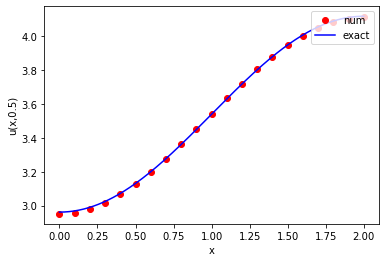

In [158]:
# Plot the final result and exact solution for forward euler
#pl.plot(x,PDE_solve_euler(1000,10,[0,0],u_I,args=(lambda t:u_diff(0,t),lambda t:u_diff(L,t)),dirichlet=None,neumann=None,periodic=None, rhs=rhs_function),'ro',label='num')
x = np.linspace(0, L, mx+1)
pl.plot(x,PDE_solve_euler(1,2,0.5,u_I3, args=(lambda t:0, lambda t:0), boundary_condition = 'neumann'),'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact3(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show
 

In [43]:
# Set problem parameters/functions
kappa = 9.0  # diffusion constant
L=2.0         # length of spatial domain
T=0.5       # total time to solve for

In [44]:
# Set up the numerical environment variables
x = np.linspace(0, L, mx+1)     # mesh points in space
t = np.linspace(0, T, mt+1)     # mesh points in time
deltax = x[1] - x[0]            # gridspacing in x
deltat = t[1] - t[0]            # gridspacing in t
lmbda = kappa*deltat/(deltax**2)    # mesh fourier number

In [45]:
def u_I4(x):
    # initial temperature distribution
    y = 2*x**2
    return y

In [46]:
def u_exact4(x,t):
    # the exact solution
    y = 4*x - ((64/pi**3)*np.exp(t*(-9/4)*pi**2)*np.sin(pi*x/2))
    return y

In [47]:
# Plot the final result and exact solution for forward euler
#pl.plot(x,PDE_solve_euler(1000,10,[0,0],u_I,args=(lambda t:u_diff(0,t),lambda t:u_diff(L,t)),dirichlet=None,neumann=None,periodic=None, rhs=rhs_function),'ro',label='num')
x = np.linspace(0, L, mx+1)
pl.plot(x,PDE_solve_euler(9,2,0.5,u_I4, args=(lambda t:0, lambda t:8), boundary_condition = 'dirichlet'),'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact4(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show

NameError: name 'dirichlet_boundary' is not defined

In [159]:
# Set problem parameters/functions
kappa = 2.0  # diffusion constant
L=2.0         # length of spatial domain
T=0.5       # total time to solve for

In [160]:
# Set up the numerical environment variables
x = np.linspace(0, L, mx+1)     # mesh points in space
t = np.linspace(0, T, mt+1)     # mesh points in time
deltax = x[1] - x[0]            # gridspacing in x
deltat = t[1] - t[0]            # gridspacing in t
lmbda = kappa*deltat/(deltax**2)    # mesh fourier number

In [161]:
def u_I5(x):
    # initial temperature distribution
    y = np.sin(pi*x/L)
    return y

In [162]:
def u_exact5(x,t):
    # the exact solution
    y = np.exp(-2*((pi**2)/4))*np.sin(pi*x/2) + np.sin(pi*x/2)*(2/(pi**2) + 9*np.exp((-t*pi**2)/2)/pi**2)
    return y

<function matplotlib.pyplot.show(close=None, block=None)>

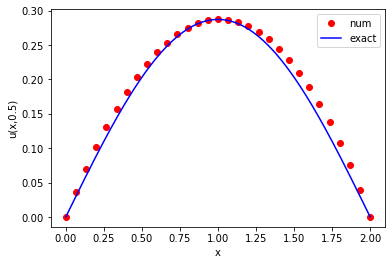

In [164]:
# Plot the final result and exact solution for forward euler
#pl.plot(x,PDE_solve_euler(1000,10,[0,0],u_I,args=(lambda t:u_diff(0,t),lambda t:u_diff(L,t)),dirichlet=None,neumann=None,periodic=None, rhs=rhs_function),'ro',label='num')
x = np.linspace(0, L, 30+1)
pl.plot(x,PDE_solve_euler(2,2,0.5,u_I5, args=(lambda x,t: np.cos(x) + t*x**2), boundary_condition = 'rhs',mx=30,mt=1000),'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact5(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show

In [132]:
# Set problem parameters/functions
k = 2.0  # diffusion constant
L=1         # length of spatial domain
T=0.5       # total time to solve for

In [133]:
# Set up the numerical environment variables
x = np.linspace(0, L, mx+1)     # mesh points in space
t = np.linspace(0, T, mt+1)     # mesh points in time
deltax = x[1] - x[0]            # gridspacing in x
deltat = t[1] - t[0]            # gridspacing in t
lmbda = kappa*deltat/(deltax**2)    # mesh fourier number

In [134]:
def u_I6(x):
    # initial temperature distribution
    y = 4*np.sin(3*pi*x) + 9*np.sin(7*pi*x)
    return y

In [135]:
def u_exact6(x,t):
    # the exact solution
    y = 4*np.exp(-t*k*(3*pi)**2)*np.sin(3*pi*x) + (1/(25*k*pi**2))*np.exp(-t*k*(5*pi)**2)*np.sin(5*pi*x) + 9*np.exp(-t*(7*pi)**2)*np.sin(7*pi*x) + (1/(k*25*pi**2))*np.sin(5*pi*x)
    return y

<function matplotlib.pyplot.show(close=None, block=None)>

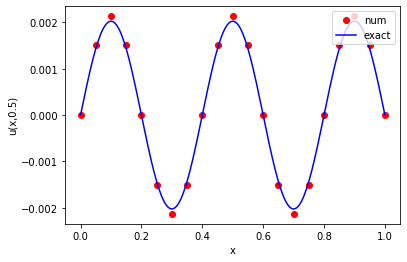

In [137]:
# Plot the final result and exact solution for forward euler
#pl.plot(x,PDE_solve_euler(1000,10,[0,0],u_I,args=(lambda t:u_diff(0,t),lambda t:u_diff(L,t)),dirichlet=None,neumann=None,periodic=None, rhs=rhs_function),'ro',label='num')
x = np.linspace(0, L, mx+1)
pl.plot(x,PDE_solve_euler(2,1,0.5,u_I6, args=(lambda x,t: np.sin(5*pi*x)), boundary_condition = 'rhs'),'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact6(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show

In [139]:
# Set problem parameters/functions
k = 1.0  # diffusion constant
L=1         # length of spatial domain
T=0.5       # total time to solve for

In [140]:
# Set up the numerical environment variables
x = np.linspace(0, L, mx+1)     # mesh points in space
t = np.linspace(0, T, mt+1)     # mesh points in time
deltax = x[1] - x[0]            # gridspacing in x
deltat = t[1] - t[0]            # gridspacing in t
lmbda = kappa*deltat/(deltax**2)    # mesh fourier number

In [141]:
def u_I7(x):
    # initial temperature distribution
    y = np.cos(2*pi*x)
    return y

In [142]:
def u_exact7(x,t):
    # the exact solution
    y = np.exp(-4*t*pi**2)*np.cos(2*pi*x) + 0.05
    return y


<function matplotlib.pyplot.show(close=None, block=None)>

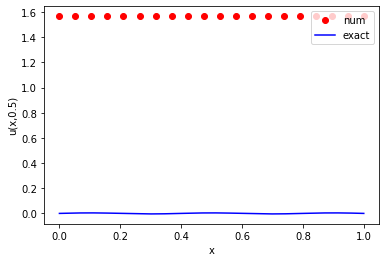

In [143]:
# plotting for periodic
x = np.linspace(0, L, mx)
pl.plot(x,PDE_solve_euler(1,1,0.5,u_I6, args=(lambda x: x*2, ), boundary_condition = 'periodic'),'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact6(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show

In [63]:
def rhs_function(A, u_j,F_j,u_jp1,j):
    u_jp1 = np.matmul(A , u_j) + deltat*F_j(x,t[j])
    u_j = u_jp1
    return u_j
    

In [64]:
def rhs_function(A, u_j,F_j,u_jp1,j):
    u_jp1[1:-1] = np.matmul(A , u_j[1:-1]).reshape(19,1) + deltat*F_j(x[1:-1],t[j]).reshape(19,1)
    u_j = u_jp1
    return u_j

In [65]:
def periodic_boundary(A, u_j):
    u_jp1 = np.matmul(A , u_j)
    u_j = u_jp1
    return u_j

In [66]:
#def dirichlet_boundary(A,s,u_j,u_jp1):
def dirichlet_boundary(A, u_j,j,s,u_jp1,lmbda,t,mx,args):
    p= args[0] 
    q = args[1]                   
    u_jp1[1:-1] = np.matmul(A , u_j[1:-1]).reshape(19,1) + lmbda*s
    u_jp1[0] = p(t[j+1]); u_jp1[mx] = q(t[j+1])
    u_j = u_jp1
    return  u_j
    

In [67]:
def Neumann_boundary(A,s,u_j,args):
    P = args[0]
    Q = args[1]
    u_jp1 = np.matmul(A , u_j).reshape(21,1) + 2*lmbda*deltax*s
    u_j = u_jp1
    return u_j
    

In [68]:
# function to solve PDE using backward euler method
def PDE_solve_back_euler(mt,mx,boundary_condition, initial_condition):
    u_j = np.zeros(x.size)        # u at current time step
    u_jp1 = np.zeros(x.size)      # u at next time step
    # u at next time step
    # Set initial condition
    for i in range(0, mx+1):
        u_j[i] = initial_condition(x[i])
    u_jp1 = np.zeros((mx+1,1))
    k = [-lmbda*np.ones(mx-2),(1+2*lmbda)*np.ones(mx-1),-lmbda*np.ones(mx-2)]
    offset = [-1,0,1]
    A_BE = diags(k,offset).toarray()
    
    for j in range(0, mt):
        u_jp1[1:-1] = np.linalg.solve(A_BE , u_j[1:-1]).reshape(9,1)
        u_j = u_jp1
    return u_j

In [69]:
# function to solve PDE using euler method
def PDE_solve_crank(mt,mx,boundary_condition, initial_condition):
    u_j = np.zeros(x.size)        # u at current time step
    u_jp1 = np.zeros(x.size)      # u at next time step
    # u at next time step
    # Set initial condition
    for i in range(0, mx+1):
        u_j[i] = initial_condition(x[i])
    u_jp1 = np.zeros((mx+1,1))
    k = [(-lmbda/2)*np.ones(mx-2),(1+lmbda)*np.ones(mx-1),(-lmbda/2)*np.ones(mx-2)]
    f = [(lmbda/2)*np.ones(mx-2),(1-lmbda)*np.ones(mx-1),(lmbda/2)*np.ones(mx-2)]
    offset = [-1,0,1]
    A_CN = diags(k,offset).toarray()
    B_CN = diags(f,offset).toarray()
    for j in range(0, mt):
        b = np.matmul(B_CN , u_j[1:-1]).reshape(9,1)
        u_jp1[1:-1] = np.linalg.solve(A_CN,b)
        u_j = u_jp1
    return u_j

In [70]:
# Plot the final result and exact solution for  back forward euler
pl.plot(x,PDE_solve_crank(1000,10,[0,0],u_I),'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 18 is different from 9)

In [176]:
def finite_diff(kappa, L, T, initial_condition ,method = 'Forward-Euler', mx=20, mt=1000):
    

    # Set up the numerical environment variables
    x = np.linspace(0, L, mx+1)     # mesh points in space
    t = np.linspace(0, T, mt+1)     # mesh points in time
    deltax = x[1] - x[0]            # gridspacing in x
    deltat = t[1] - t[0]            # gridspacing in t
    lmbda = kappa*deltat/(deltax**2)    # mesh fourier number

    
    # Set up the solution variables
    u_j = np.zeros(x.size)        # u at current time step
    u_jp1 = np.zeros(x.size)      # u at next time step
    
    # Set initial condition
    for i in range(0, mx+1):
        u_j[i] = initial_condition(x[i])
    
    if method == 'Forward-Euler':
        u_jp1 = np.zeros(mx+1)
        k = [lmbda*np.ones(mx-2),(1-2*lmbda)*np.ones(mx-1),lmbda*np.ones(mx-2)]
        offset = [-1,0,1]
        A = diags(k,offset).toarray()


        for j in range(0, mt):
            u_jp1[1:-1] = np.matmul(A , u_j[1:-1])
            u_j = u_jp1
            
    elif method == 'Backward-Euler':
        u_jp1 = np.zeros(mx+1)
        k = [-lmbda*np.ones(mx-2),(1+2*lmbda)*np.ones(mx-1),-lmbda*np.ones(mx-2)]
        offset = [-1,0,1]
        A_BE = diags(k,offset).toarray()


        for j in range(0, mt):
            u_jp1[1:-1] = np.linalg.solve(A_BE , u_j[1:-1])
            u_j = u_jp1
    
    elif method == 'Crank-Nicholson':
        u_jp1 = np.zeros(mx+1)
        k = [(-lmbda/2)*np.ones(mx-2),(1+lmbda)*np.ones(mx-1),(-lmbda/2)*np.ones(mx-2)]
        f = [(lmbda/2)*np.ones(mx-2),(1-lmbda)*np.ones(mx-1),(lmbda/2)*np.ones(mx-2)]
        offset = [-1,0,1]
        A_CN = diags(k,offset).toarray()
        B_CN = diags(f,offset).toarray()


        for j in range(0, mt):
            b = np.matmul(B_CN , u_j[1:-1])
            u_jp1[1:-1] = np.linalg.solve(A_CN,b)
            u_j = u_jp1
            
    else:
        raise ValueError("Invalid method, please input 'Forward-Euler', 'Backward-Euler' or 'Crank-Nicholson'.")
        
    return u_j

In [177]:
finite_diff(1,1,0.5,u_I3,method = 'Crank-Nicholson')

array([0.        , 0.00338107, 0.0066789 , 0.00981226, 0.01270402,
       0.01528296, 0.01748558, 0.01925765, 0.02055553, 0.02134727,
       0.02161337, 0.02134727, 0.02055554, 0.01925766, 0.01748559,
       0.01528296, 0.01270402, 0.00981227, 0.0066789 , 0.00338108,
       0.        ])

In [178]:
mx = 20
mt =1000
L = 1
kappa = 1
T =0.5
# Set up the numerical environment variables
x = np.linspace(0, L, mx+1)     # mesh points in space
t = np.linspace(0, T, mt+1)     # mesh points in time
deltax = x[1] - x[0]            # gridspacing in x
deltat = t[1] - t[0]            # gridspacing in t
lmbda = kappa*deltat/(deltax**2)    # mesh fourier number



<function matplotlib.pyplot.show(close=None, block=None)>

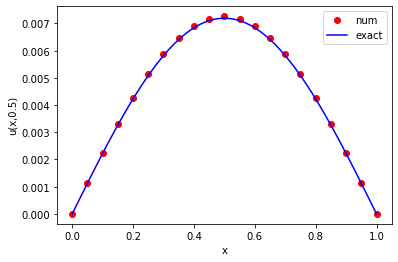

In [180]:
# Plot the final result and exact solution for  back forward euler
pl.plot(x,finite_diff(1,1,0.5,u_I,method = 'Crank-Nicholson'),'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show

In [73]:
# Adapt your numerical continuation code (from the ODEs part of the course) so that it can also
#track, under variations of a parameter in the system, steady-states of second-order diffusive PDEs.

In [74]:
# change value of dirichlet on the right hand side
# reinput the u_j as the initial temperature distribution
# restricted scope

In [75]:
def Numerical_Continuation_kappa(L, T, initial_condition, start, end, h, args, boundary_condition=None, mx=20, mt=1000):
    
   
    
    n = []
    #root = PDE_solve_euler(,L,T,initial_condition, args=args, boundary_condition=boundary_condition,mx=20,mt=1000)
    #initial_condition = root
    
    
    
    for parameter in np.arange(start,end,h):
         
        #root = PDE_solve_euler(initial_condition, args=args, boundary_condition=boundary_condition)
        root = PDE_solve_euler(parameter,L,T,initial_condition, args=args, boundary_condition=boundary_condition,mx=20,mt=1000)
        initial_condition = root
        n.append(root)
    
    i=0
    for i in range(len(n)):
    #print(n[0])
        pl.plot(np.linspace(0, L, mx+1),n[i],'ro',label='num')
    
    #n[-1]
    #pl.plot(np.linspace(0, L, mx+1),root,'ro',label='num')
    
    return 

In [76]:
Numerical_Continuation(1, 0.5, u_I, 0, 2, 0.1, args=(lambda t:0, lambda t:0), boundary_condition='dirichlet', mx=20, mt=1000)

NameError: name 'Numerical_Continuation' is not defined

In [77]:
Numerical_Continuation(1, 0.5, u_I, 0, 2, 0.1, args=(lambda t:0, lambda t:0), boundary_condition='dirichlet', mx=20, mt=1000)
xx = np.linspace(0,1,250)
T = 0.5
L = 1
for kappa in np.arange(0,2,0.1):
    y = np.exp(-kappa*(pi**2/L**2)*T)*np.sin(pi*xx/L)

    pl.plot(xx,y,'b-',label='exact')

NameError: name 'Numerical_Continuation' is not defined

In [78]:
PDE_solve_euler(2,1,0.5,u_I,args=(lambda t:1, lambda t:0), boundary_condition='dirichlet',mx=20,mt=1000)


array([[1.        ],
       [0.95000287],
       [0.90000566],
       [0.85000832],
       [0.80001078],
       [0.75001296],
       [0.70001483],
       [0.65001633],
       [0.60001743],
       [0.55001811],
       [0.50001833],
       [0.45001811],
       [0.40001743],
       [0.35001633],
       [0.30001483],
       [0.25001296],
       [0.20001078],
       [0.15000832],
       [0.10000566],
       [0.05000287],
       [0.        ]])

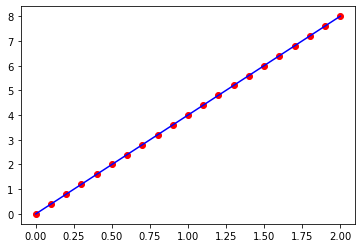

In [79]:
pl.plot(np.linspace(0, 2, 20+1),PDE_solve_euler(9,2,0.5,u_I4,args=(lambda t:0, lambda t:8), boundary_condition='dirichlet',mx=20,mt=1000),'ro',label='num')
xx = np.linspace(0,2,250)
pl.plot(xx,u_exact4(xx,T),'b-',label='exact')

In [80]:
# Set up the numerical environment variables
x = np.linspace(0, L, mx+1)     # mesh points in space
t = np.linspace(0, T, mt+1)     # mesh points in time
deltax = x[1] - x[0]            # gridspacing in x
deltat = t[1] - t[0]            # gridspacing in t
lmbda = kappa*deltat/(deltax**2)    # mesh fourier number
print("deltax=",deltax)
print("deltat=",deltat)
print("lambda=",lmbda)

deltax= 0.05
deltat= 0.0005
lambda= 0.3999999999999999


In [81]:
def PDE_solve_euler(kappa,L,T,initial_condition, args=(), boundary_condition=None,mx=20,mt=1000):

SyntaxError: unexpected EOF while parsing (<ipython-input-81-61498f6fcaa8>, line 1)

In [82]:
def PDE_solve_euler(kappa,L,T,initial_condition, args=(), boundary_condition=None,mx=20,mt=1000):

    """
    A function that the euler method to solve the 1D heat equation.

    Parameters
    ----------

    initial_condition:

    args:

    boundary_condition:


    Returns
    -------

    """
    
    
    
    
    #mt = 1000
    #mx = 20
    # Set up the numerical environment variables
    x = np.linspace(0, L, mx+1)     # mesh points in space
    t = np.linspace(0, T, mt+1)     # mesh points in time
    deltax = x[1] - x[0]            # gridspacing in x
    deltat = t[1] - t[0]            # gridspacing in t
    lmbda = kappa*deltat/(deltax**2)    # mesh fourier number



    u_j = np.zeros(x.size)        # u at current time step
    u_jp1 = np.zeros((mx+1,1))
    k = [lmbda*np.ones(mx-2),(1-2*lmbda)*np.ones(mx-1),lmbda*np.ones(mx-2)]
    offset = [-1,0,1]
    A = diags(k,offset,shape=(mx-1, mx-1)).toarray()

    if boundary_condition == 'periodic':
        u_j = np.zeros(mx)
        k = [lmbda*np.ones(mx-1),(1-2*lmbda)*np.ones(mx),lmbda*np.ones(mx-1)]

        offset = [-1,0,1]
        A = diags(k,offset).toarray()
        A[-1,0] = lmbda
        A[0,-1] = lmbda
        for i in range(0, mx):
            u_j[i] = initial_condition(x[i])
        for j in range(0, mt):
            u_j = periodic_boundary(A, u_j)


    elif boundary_condition == 'rhs':

       # u_jp1 = np.zeros(x.size)
        u_jp1 = np.zeros((mx+1,1))
        k = [lmbda*np.ones(mx-2),(1-2*lmbda)*np.ones(mx-1),lmbda*np.ones(mx-2)]
        F_j = args

       # k = [lmbda*np.ones(mx),(1-2*lmbda)*np.ones(mx+1),lmbda*np.ones(mx)]
        offset = [-1,0,1]
        A = diags(k,offset).toarray()

        if callable(initial_condition) is False:
            u_j = initial_condition


        else:
            for i in range(0, mx+1):
                u_j[i] = initial_condition(x[i])

        #for i in range(0, mx+1):
           # u_j[i] = initial_condition(x[i])

        for j in range(0, mt):
            u_j = rhs_function(A, u_j,F_j,u_jp1,j,deltat,x,t,mx)


    else:
        if callable(initial_condition) is False:
            u_j = initial_condition


        else:
            for i in range(0, mx+1):
                u_j[i] = initial_condition(x[i])



        for j in range(0, mt):
            if boundary_condition == 'dirichlet':
                # s = np.zeros((mx-1,1))
                p = args[0]
                q = args[1]
                s = np.zeros((mx-1,1))
                s[0] = p(t[j])
                s[-1] = q(t[j])
                 #u_j = dirichlet(A,s,u_j,u_jp1)
                u_j = dirichlet_boundary(A, u_j,j,s,u_jp1,lmbda,t,mx,args=args)


            elif boundary_condition== 'neumann':
                k = [lmbda*np.ones(mx),(1-2*lmbda)*np.ones(mx+1),lmbda*np.ones(mx)]
                offset = [-1,0,1]
                A = diags(k,offset).toarray()
                A[0,1] = 2*lmbda
                A[-1,-2] = 2*lmbda
                s = np.zeros((mx+1,1))

                P = args[0]
                Q = args[1]
                s[0] = -P(t[j])
                s[-1] = Q(t[j])
                u_j = Neumann_boundary(A,s,u_j,lmbda,deltax,args=args)

            elif boundary_condition == None:
                u_jp1[1:-1] = np.matmul(A , u_j[1:-1]).reshape(19,1)
                u_j = u_jp1

        return u_j
    return u_j



In [83]:
def rhs_function(A, u_j,F_j,u_jp1,j,deltat,x,t,mx):
    u_jp1[1:-1] = np.matmul(A , u_j[1:-1]).reshape(19,1) + deltat*F_j(x[1:-1],t[j]).reshape(19,1)
    u_j = u_jp1
    return u_j


ValueError: x and y must have same first dimension, but have shapes (20,) and (21,)

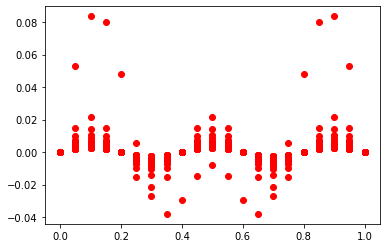

In [84]:
L=1
T = 0.5
xx = np.linspace(0,1,20)
Numerical_Continuation_kappa(1,0.5,u_I6, 0.1,2,0.1,args=(lambda x,t: np.sin(5*pi*x)), boundary_condition = 'rhs',mx=20,mt=1000)
for kappa in np.arange(0.1,2,0.1):
    y = 4*np.exp(-T*kappa*(3*pi)**2)*np.sin(3*pi*x) + (1/(25*kappa*pi**2))*np.exp(-T*kappa*(5*pi)**2)*np.sin(5*pi*x) + 9*np.exp(-T*(7*pi)**2)*np.sin(7*pi*x) + (1/(kappa*25*pi**2))*np.sin(5*pi*x)
    pl.plot(xx,y,'b-',label='exact')
pl.title('Varying the diffusion constant of the unhomogenous heat equation ')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')



Text(0.5, 1.0, 'Varying the diffusion constant of the heat equation with homogenous dirichlet boundary ')

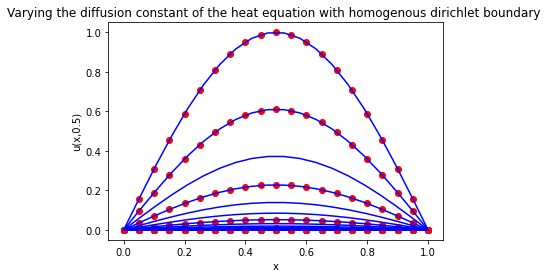

In [85]:
L=1
Numerical_Continuation_kappa(1, 0.5, u_I, 0, 2, 0.1, args=(lambda t:0, lambda t:0), boundary_condition='dirichlet', mx=20, mt=1000)
xx = np.linspace(0,1,20)
T = 0.5
for kappa in np.arange(0,2,0.1):
    y = np.exp(-kappa*(pi**2/L**2)*T)*np.sin(pi*xx/L)
    pl.plot(xx,y,'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.title('Varying the diffusion constant of the heat equation with homogenous dirichlet boundary ')


In [86]:
from operator import sub


In [87]:
def testing_dirichlet(solver,k,L,T,initial_condition,args, boundary_condition= 'Dirichlet',mx=20,mt=1000):
    #(Hopf,phase_condition_func,(b,s)) = args
    
    # adding tests to check that the code handles errors gracefully
   # if np.size(initial_guess) != 3:
        #print("must specify 3 input arguments for a system of 2 ODE's")
    #else:
    
    root = solver(k,L,T,initial_condition,args=args, boundary_condition= boundary_condition,mx=mx,mt=mt)

        
    # defining the true solution
    #true_sol = [np.sqrt(b)*np.cos(initial_guess[-1]+root[-1]), np.sqrt(b)*np.sin(initial_guess[-1]+root[-1])]
    
    n = []
    for i in np.linspace(0,L,mx+1):
        true_sol = 4*i - ((64/pi**3)*np.exp(T*(-9/4)*pi**2)*np.sin(pi*i/2))
        n.append(true_sol)
    
    #n= np.array(n)
    #root=np.array(root)
        # calculating the error
    #error = n-root
    error = [a - b for a, b in zip(n, root)]
    h = np.zeros(mx+1)
   
    if np.allclose(error,h,rtol=1e-04, atol=1e-04) == True:
        result = print('Test passed')
    else:
        result = print('Test failed')
    return 

In [88]:
# if the test has failed then the roots found are not within a tolerance of the true solution
testing(PDE_solve_euler,9,2,0.5,u_I4,args=(lambda t:0, lambda t:8), boundary_condition='dirichlet',mx=20,mt=1000)

NameError: name 'testing' is not defined

In [89]:
def testing_periodic(solver,k,L,T,initial_condition,args, boundary_condition= 'Dirichlet',mx=20,mt=1000):
    #(Hopf,phase_condition_func,(b,s)) = args
    
    # adding tests to check that the code handles errors gracefully
   # if np.size(initial_guess) != 3:
        #print("must specify 3 input arguments for a system of 2 ODE's")
    #else:
    
    root = solver(k,L,T,initial_condition,args=args, boundary_condition= boundary_condition,mx=mx,mt=mt)

        
    # defining the true solution
    #true_sol = [np.sqrt(b)*np.cos(initial_guess[-1]+root[-1]), np.sqrt(b)*np.sin(initial_guess[-1]+root[-1])]
    
    n = []
    for i in np.linspace(0,L,mx):
        true_sol = np.exp(-4*T*pi**2)*np.cos(2*pi*i)
        n.append(true_sol)
    
    #n= np.array(n)
    #root=np.array(root)
        # calculating the error
    #error = n-root
    error = [a - b for a, b in zip(n, root)]
    h = np.zeros(mx)
   
    if np.allclose(error,h,rtol=1e-04, atol=1e-04) == True:
        result = print('Test passed')
    else:
        result = print('Test failed')
    return 

In [90]:
testing_periodic(PDE_solve_euler,1,1,0.5,u_I7, args=(), boundary_condition = 'periodic')

Test passed


In [203]:
def testing_neumann(solver,initial_condition,args, boundary_condition= 'Dirichlet',mx=20,mt=1000):
    #(Hopf,phase_condition_func,(b,s)) = args
    
    # adding tests to check that the code handles errors gracefully
   # if np.size(initial_guess) != 3:
        #print("must specify 3 input arguments for a system of 2 ODE's")
    #else:
    L = 2
    T = 0.5
    k=1
    root = solver(k,L,T,initial_condition,args=args, boundary_condition= boundary_condition,mx=mx,mt=mt)
   
        
    # defining the true solution
    #true_sol = [np.sqrt(b)*np.cos(initial_guess[-1]+root[-1]), np.sqrt(b)*np.sin(initial_guess[-1]+root[-1])]
    
    n = []
    for i in np.linspace(0,L,mx):
        true_sol = 0.5*(5*(1-np.cos(2))) - ((20*np.cos(2) + 20)/(-4 + pi**2))*np.exp(-(pi**2)*T/2**2)*np.cos(pi*i/2)
        n.append(true_sol)
    
    #n= np.array(n)
    #root=np.array(root)
        # calculating the error
    #error = n-root
    error = [a - b for a, b in zip(n, root)]
    h = np.zeros(mx)
   
    if np.allclose(error,h,rtol=1e-01, atol=1e-01) == True:
        result = print('Test passed')
    else:
        result = print('Test failed')
    return root, n

In [204]:
testing_neumann(PDE_solve_euler,u_I3, args=(lambda t:0, lambda t:0), boundary_condition = 'neumann')

Test passed


(array([2.9503798 , 2.95782542, 2.97995755, 3.01616917, 3.06547196,
        3.12653016, 3.19770542, 3.2771103 , 3.36266805, 3.45217559,
        3.54336718, 3.63397625, 3.72179326, 3.80471797, 3.88080502,
        3.94830242, 4.00568278, 4.05166774, 4.0852463 , 4.10568792,
        4.11255102]),
 [2.9610244962729078,
  2.9689259741532874,
  2.9924148760754643,
  3.030850486026,
  3.0831843807596,
  3.147989028052214,
  3.2234967260588068,
  3.307647821611637,
  3.3981468921895575,
  3.4925253590606724,
  3.588208823675039,
  3.6825872905461536,
  3.773086361124074,
  3.8572374566769043,
  3.9327451546834973,
  3.9975498019761115,
  4.049883696709712,
  4.088319306660247,
  4.111808208582424,
  4.119709686462803])

In [93]:
def testing_s(solver,T,initial_condition,args, boundary_condition= 'Dirichlet',mx=20,mt=1000):
    #(Hopf,phase_condition_func,(b,s)) = args
    
    # adding tests to check that the code handles errors gracefully
   # if np.size(initial_guess) != 3:
        #print("must specify 3 input arguments for a system of 2 ODE's")
    #else:
    L = 1
    k=2
    root = solver(k,L,T,initial_condition,args=args, boundary_condition= boundary_condition,mx=mx,mt=mt)
   
        
    # defining the true solution
    #true_sol = [np.sqrt(b)*np.cos(initial_guess[-1]+root[-1]), np.sqrt(b)*np.sin(initial_guess[-1]+root[-1])]
    
    n = []
    for i in np.linspace(0,L,mx):
        true_sol = 4*np.sin(3*pi*i) + 9*np.sin(7*pi*i)
        n.append(true_sol)
    
    #n= np.array(n)
    #root=np.array(root)
        # calculating the error
    #error = n-root
    error = [a - b for a, b in zip(n, root)]
    h = np.zeros(mx)
   
    if np.allclose(error,h,rtol=1e-04, atol=1e-04) == True:
        result = print('Test passed')
    else:
        result = print('Test failed')
    return 

In [94]:
testing_s(PDE_solve_euler,0.5,u_I6, args=(lambda x,t: np.sin(5*pi*x)), boundary_condition = 'rhs',mx=20,mt=1000)
# plotting the analytical solution

Test failed


In [112]:
def testing_4(solver,T,initial_condition,args, boundary_condition= 'Dirichlet',mx=20,mt=1000):
    #(Hopf,phase_condition_func,(b,s)) = args
    
    # adding tests to check that the code handles errors gracefully
   # if np.size(initial_guess) != 3:
        #print("must specify 3 input arguments for a system of 2 ODE's")
    #else:
    L = 1
    k=2
    root = solver(k,L,T,initial_condition,args=args, boundary_condition= boundary_condition,mx=mx,mt=mt)
   
        
    # defining the true solution
    #true_sol = [np.sqrt(b)*np.cos(initial_guess[-1]+root[-1]), np.sqrt(b)*np.sin(initial_guess[-1]+root[-1])]
    
    n = []
    for i in np.linspace(0,L,mx):
        true_sol = y = 4*np.exp(-T*2*(3*pi)**2)*np.sin(3*pi*i) + (1/(25*2*pi**2))*np.exp(-T*2*(5*pi)**2)*np.sin(5*pi*i) + 9*np.exp(-T*(7*pi)**2)*np.sin(7*pi*i) + (1/(2*25*pi**2))*np.sin(5*pi*i)
        n.append(true_sol)
    
    #n= np.array(n)
    #root=np.array(root)
        # calculating the error
    #error = n-root
    error = [a - b for a, b in zip(n, root)]
    h = np.zeros(mx)
   
    if np.allclose(error,h,rtol=1e-02, atol=1e-02) == True:
        result = print('Test passed')
    else:
        result = print('Test failed')
    return 

In [113]:
testing_4(PDE_solve_euler,0.5,u_I6, args=(lambda x,t: np.sin(5*pi*x)), boundary_condition = 'rhs',mx=20,mt=1000)

Test passed
